In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Loading Dataset


In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Data Visualization

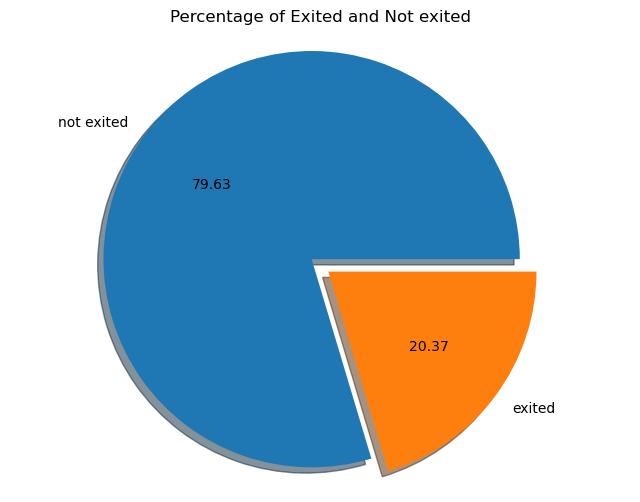

In [5]:
Exited_percent = df['Exited'].value_counts(normalize = True)* 100
plt.figure(figsize=(8,6))
plt.pie(Exited_percent, labels = ['not exited','exited'], autopct='%.2f',explode = [0,0.1], shadow=True)
plt.title('Percentage of Exited and Not exited')
plt.axis('equal')
plt.show()

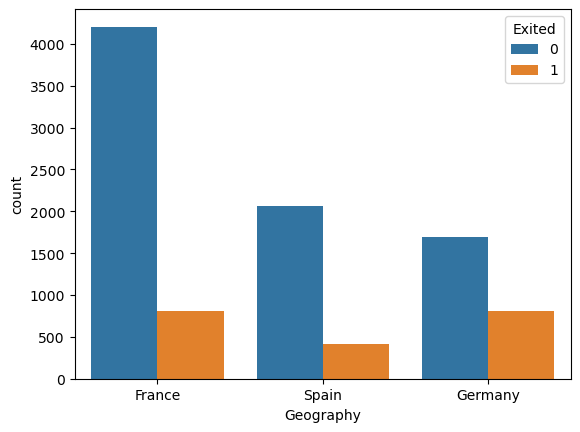

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [6]:
sns.countplot(x='Geography', hue='Exited', data = df)
plt.show()
pd.crosstab(df['Geography'],df['Exited'])

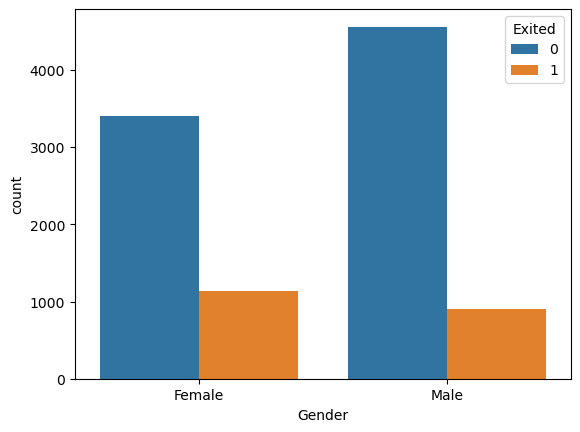

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [7]:
sns.countplot(x='Gender', hue='Exited', data = df)
plt.show()
pd.crosstab(df['Gender'],df['Exited'])

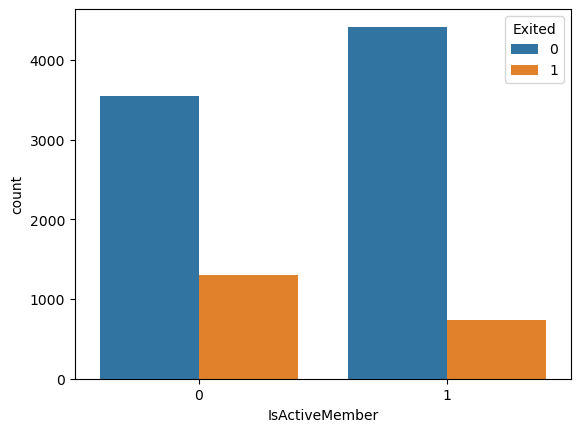

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


In [8]:
sns.countplot(x='IsActiveMember', hue = 'Exited', data = df)
plt.show()
pd.crosstab(df['IsActiveMember'],df['Exited'])

This is showing that less active members have exited more than active members

<Axes: xlabel='Exited', ylabel='Age'>

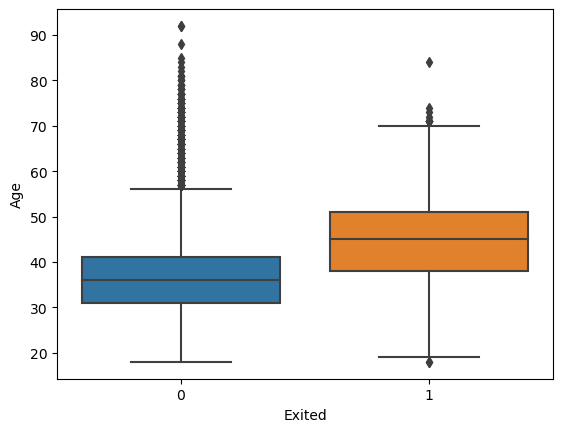

In [9]:
sns.boxplot(x = 'Exited', y = 'Age', data = df )

This Boxplot shows that older people are most likely to exit than the younger ones


<Axes: xlabel='Exited', ylabel='Tenure'>

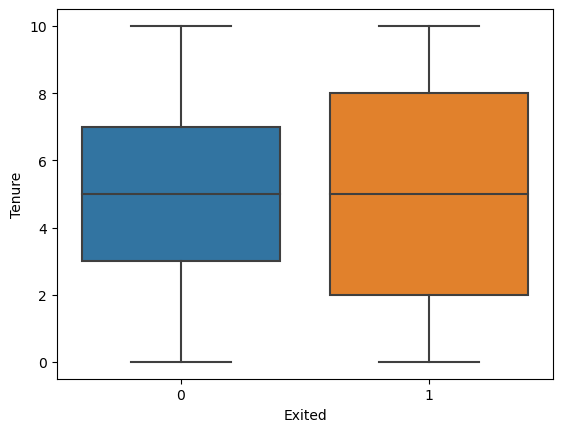

In [10]:
sns.boxplot(x = 'Exited', y = 'Tenure', data = df )

This shows at what tenure people have exited and not exited


<Axes: xlabel='Exited', ylabel='Balance'>

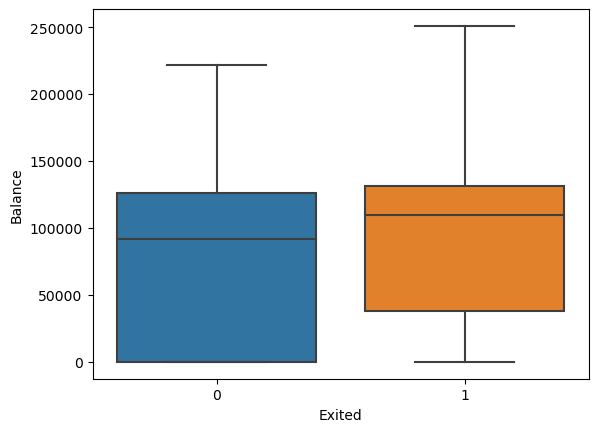

In [11]:
sns.boxplot(x = 'Exited', y = 'Balance', data = df )

This shows that people with higher balance have exited more

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

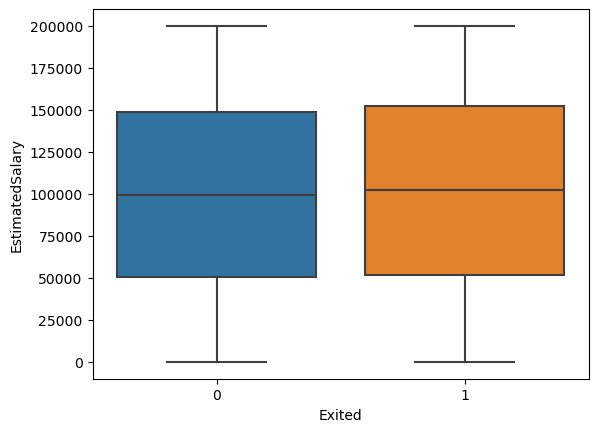

In [12]:
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = df )

This shows that the estimated salary of the people who have exited and not exited is almost similar

<Axes: xlabel='Exited', ylabel='CreditScore'>

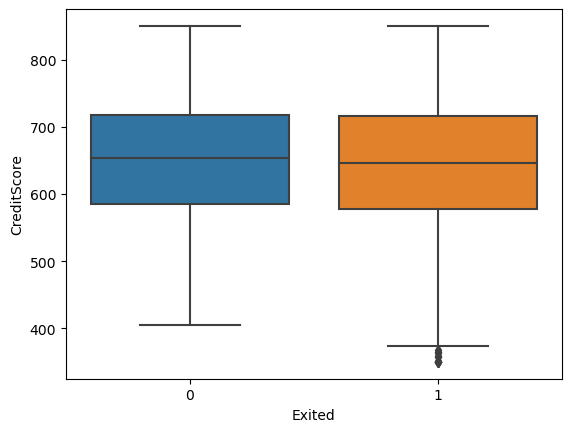

In [15]:
sns.boxplot(x='Exited', y='CreditScore', data = df)

This is showing that people with less credit score have exited


In [17]:
lab_encode = LabelEncoder()
df['Geography'] = lab_encode.fit_transform(df['Geography'])
df['Gender'] = lab_encode.fit_transform(df['Gender'])

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


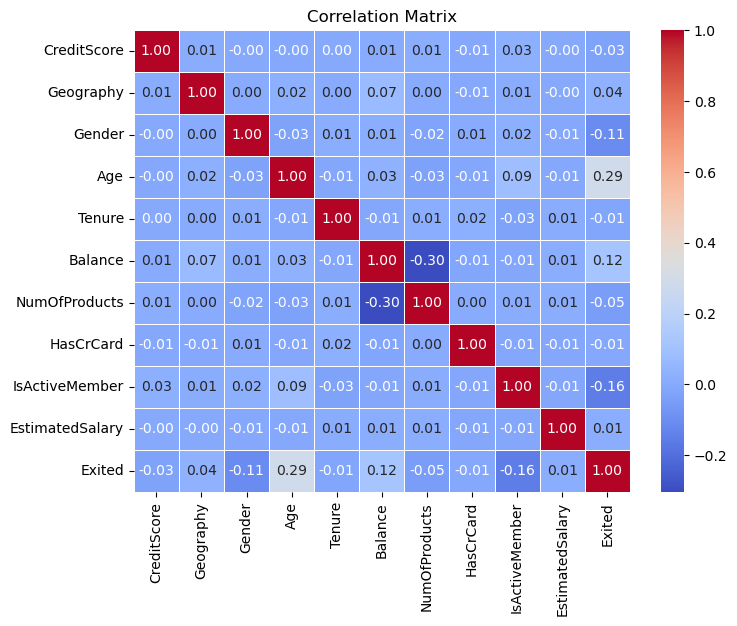

In [20]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

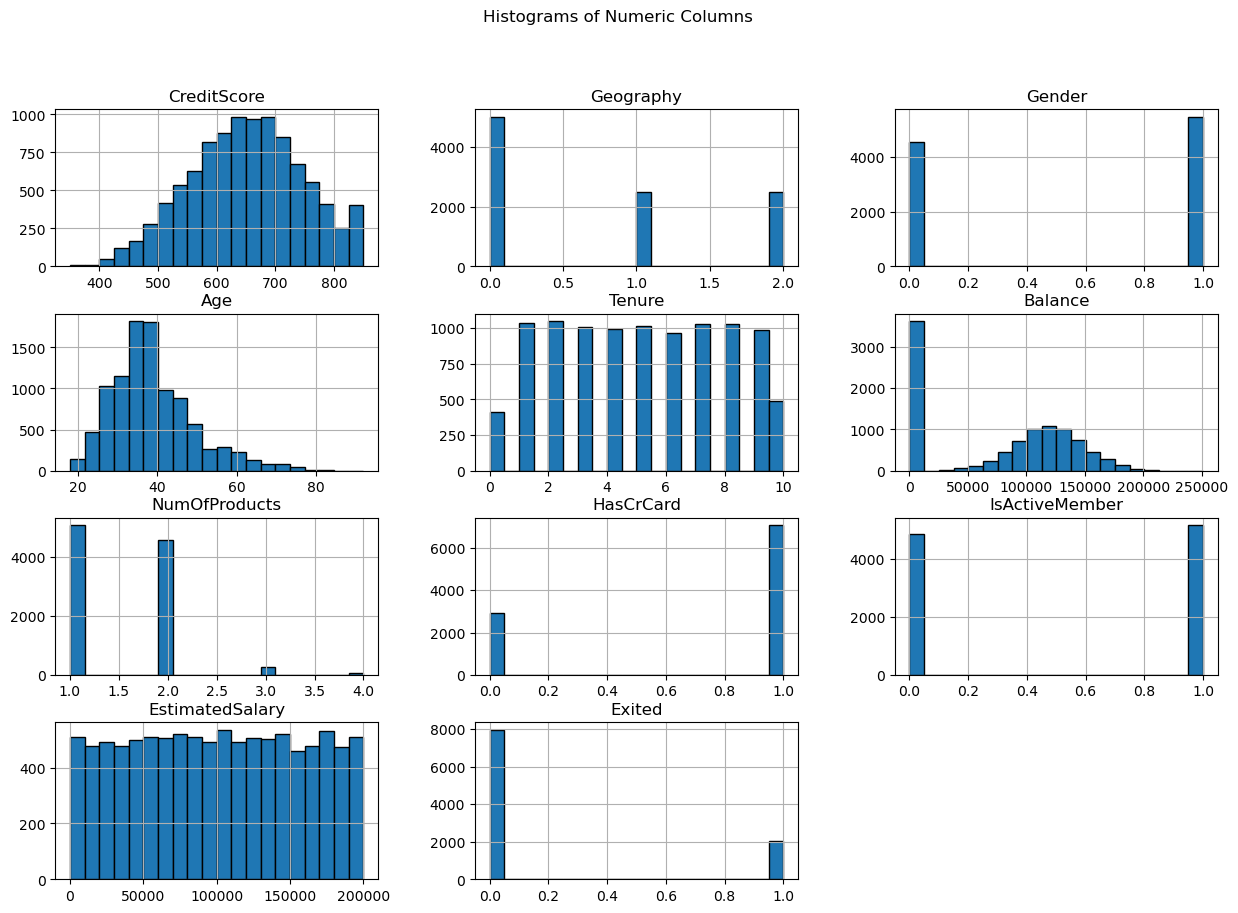

In [21]:
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Columns')
plt.show()

In [23]:
X = df.drop(['Exited'], axis = 1)
y = df['Exited']

# Standardizing the Data

In [30]:
scaler = StandardScaler()
X= scaler.fit_transform(X)

# Spliting the Dataset

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Creating Logistic Regression Model for Prediction

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)

In [34]:
print("\nAccuracy: ",accuracy_score(y_test,logreg_pred))
print("\nClassification Report: ",classification_report(y_test,logreg_pred))
print("\nConfusion Matrix: \n",confusion_matrix(y_test,logreg_pred))
print("\nROC Score: \n", roc_auc_score(y_test, logreg_pred))



Accuracy:  0.806

Classification Report:                precision    recall  f1-score   support

           0       0.82      0.97      0.89      1585
           1       0.61      0.18      0.28       415

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.58      2000
weighted avg       0.78      0.81      0.76      2000


Confusion Matrix: 
 [[1536   49]
 [ 339   76]]

ROC Score: 
 0.5761088518110296


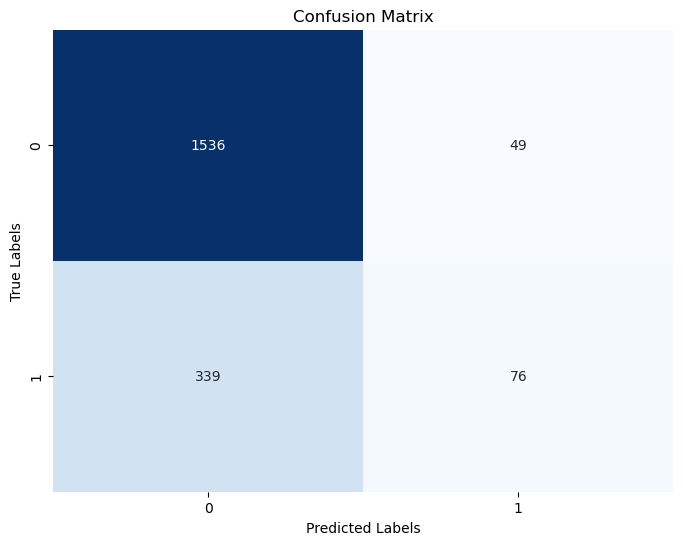

In [35]:
conf_matrix = confusion_matrix(y_test, logreg_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

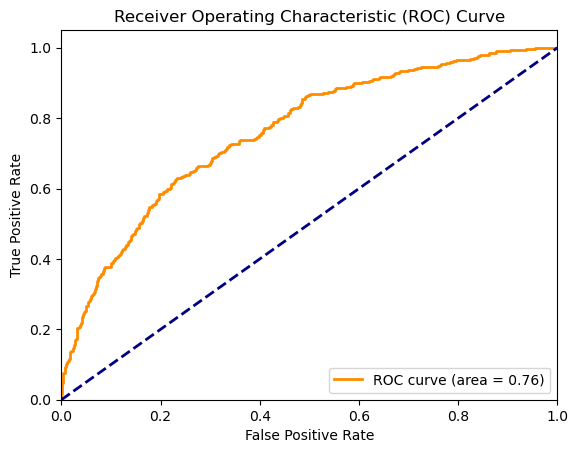

In [36]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Creating Random Forest Model for Prediction

In [37]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [39]:
print("\nAccuracy: ",accuracy_score(y_test,rf_pred))
print("\nClassification Report: ",classification_report(y_test,rf_pred))
print("\nConfusion Matrix: \n",confusion_matrix(y_test,rf_pred))
print("\nROC_AUC_Score: ",roc_auc_score(y_test,rf_pred))



Accuracy:  0.8595

Classification Report:                precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.80      0.43      0.56       415

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000


Confusion Matrix: 
 [[1542   43]
 [ 238  177]]

ROC_AUC_Score:  0.6996883432784767


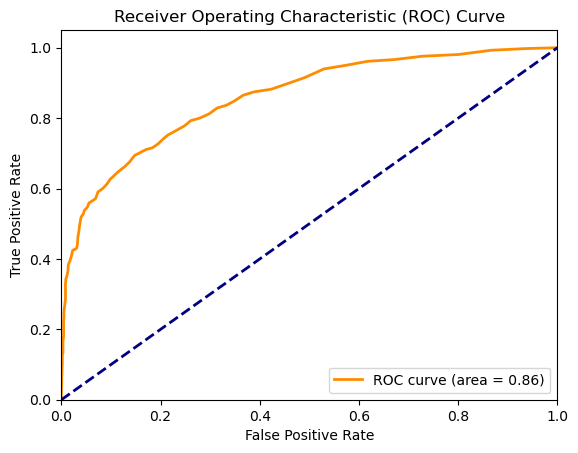

In [40]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Creating Gradient Boosting Model for Prediction

In [41]:
gr_boost = GradientBoostingClassifier()
gr_boost.fit(X_train, y_train)
gr_pred = gr_boost.predict(X_test)

In [42]:
print("\nAccuracy: ",accuracy_score(y_test,gr_pred))
print("\nClassification Report: ",classification_report(y_test,gr_pred))
print("\nConfusion Matrix: \n",confusion_matrix(y_test,gr_pred))
print("\nROC_AUC_Score: ",roc_auc_score(y_test,gr_pred))



Accuracy:  0.864

Classification Report:                precision    recall  f1-score   support

           0       0.87      0.97      0.92      1585
           1       0.80      0.46      0.58       415

    accuracy                           0.86      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000


Confusion Matrix: 
 [[1538   47]
 [ 225  190]]

ROC_AUC_Score:  0.7140891642278894


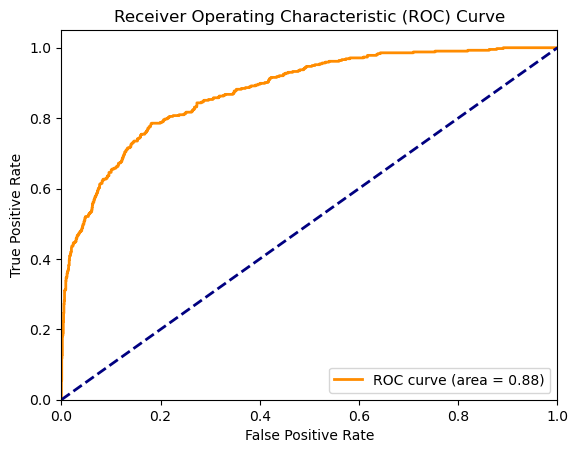

In [44]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, gr_boost.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()